#### 1. Dataset Selection
You can use the Online Retail Customer Segmentation dataset available on Kaggle.
https://www.kaggle.com/datasets/tunguz/online-retail/data

#### 2. Business Case

Customer segmentation helps businesses:

Target Marketing: Tailor marketing strategies to specific customer groups.
Improve Customer Experience: Personalize services based on customer preferences.
Increase Sales: Identify high-value customers for upselling and cross-selling opportunities.

#### 3. Data Preparation

In [57]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Online Retail.csv')

In [58]:
# Display the first few rows
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [18]:
# Check for missing values
print(data.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [22]:
# Drop rows with missing values
data.dropna(inplace=True)

In [23]:
# Convert 'InvoiceDate' to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [24]:
# Create a 'TotalSpend' column
data['TotalSpend'] = data['Quantity'] * data['UnitPrice']

#### 4. Data Transformations
You may want to segment customers based on their purchasing behavior:

In [25]:
# Group by CustomerID and aggregate data
customer_data = data.groupby('CustomerID').agg({
    'TotalSpend': 'sum',
    'InvoiceNo': 'count',
    'InvoiceDate': 'max'
}).reset_index()

# Rename columns for clarity
customer_data.columns = ['CustomerID', 'TotalSpend', 'Frequency', 'LastPurchaseDate']


#### 5. Visualizations
Visualizing the segments can provide insights into customer behavior:

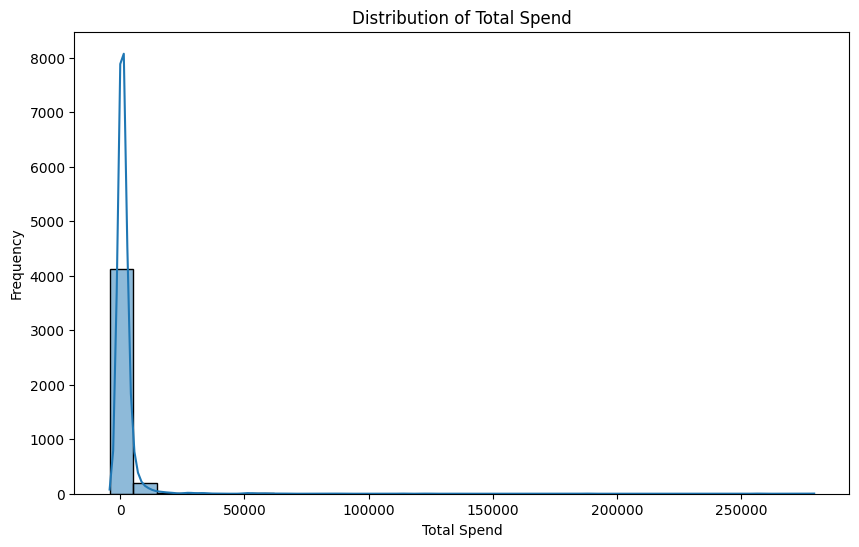

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize Total Spend distribution
plt.figure(figsize=(10, 6))
sns.histplot(customer_data['TotalSpend'], bins=30, kde=True)
plt.title('Distribution of Total Spend')
plt.xlabel('Total Spend')
plt.ylabel('Frequency')
plt.show()


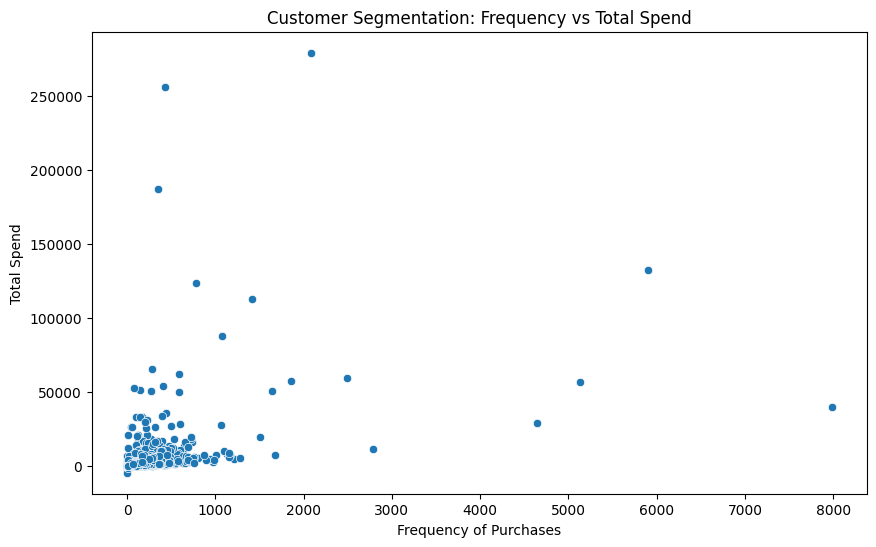

In [60]:

# Scatter plot for Frequency vs Total Spend
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_data, x='Frequency', y='TotalSpend')
plt.title('Customer Segmentation: Frequency vs Total Spend')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Total Spend')
plt.show()

Using K-Means clustering is a great way to identify distinct customer segments based on their purchasing behavior. Here’s a step-by-step guide on how to implement K-Means clustering in your customer segmentation project:

##### 6. Data Preparation
Ensure your data is ready for clustering. You might want to scale your features for better performance.

In [27]:
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = customer_data[['TotalSpend', 'Frequency']]

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


#### 7. Applying KMeans Clustering
You can now apply the K-Means algorithm to your scaled data.

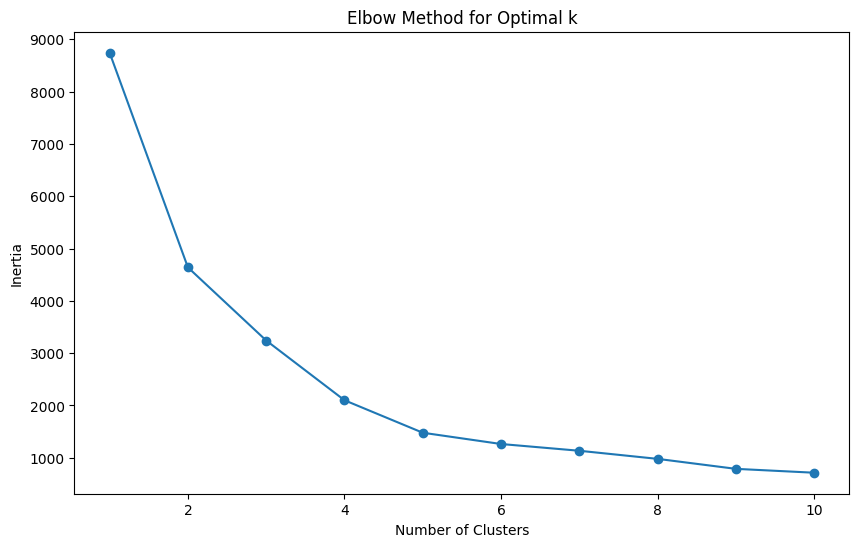

In [28]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the Elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


### 8. Choosing the Number of Clusters
From the Elbow plot, choose the number of clusters where the inertia starts to decrease at a slower rate (the “elbow” point).

also, Fitting the K-Means Model
Once you’ve chosen the number of clusters, fit the K-Means model.

In [29]:
# Fit the model with the chosen number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_features)

#### 9. Visualizing the Clusters
Visualize the clusters to understand the segmentation better.

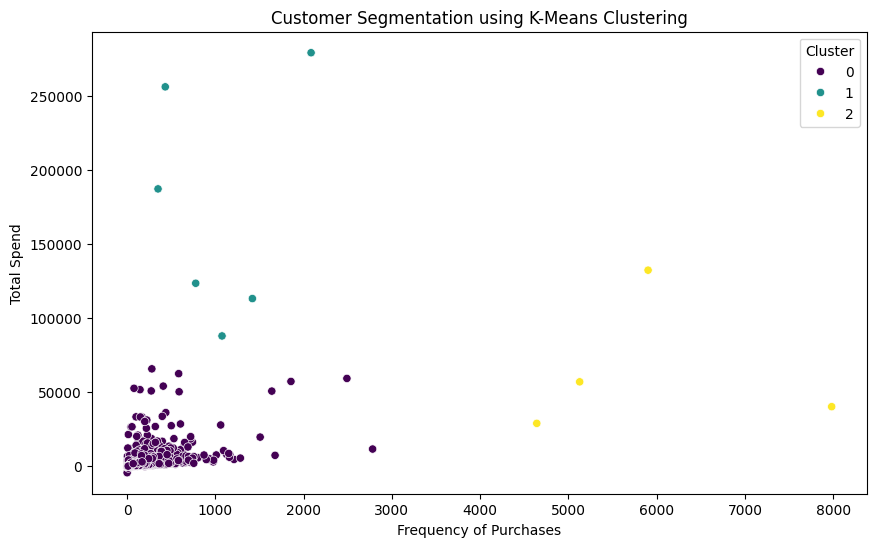

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_data, x='Frequency', y='TotalSpend', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation using K-Means Clustering')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Total Spend')
plt.legend(title='Cluster')
plt.show()


#### 10. Interpreting the Results
Analyze the clusters to understand the characteristics of each segment. For example:

Cluster 0: High spenders with frequent purchases.
Cluster 1: Occasional buyers with moderate spending.
Cluster 2: Low spenders with infrequent purchases.

We can now choose and prioritize our customers accordingly, based on the clusters

#### 11. Conclusion
K-Means clustering can provide valuable insights into customer behavior, helping businesses tailor their marketing strategies effectively.

### Other Insights to learn from the data include: 
##### 1. Purchase Frequency Over Time

##### Visualization: Line chart showing the number of purchases over time.
##### Insight: Identify trends in customer purchasing behavior, such as seasonal spikes.

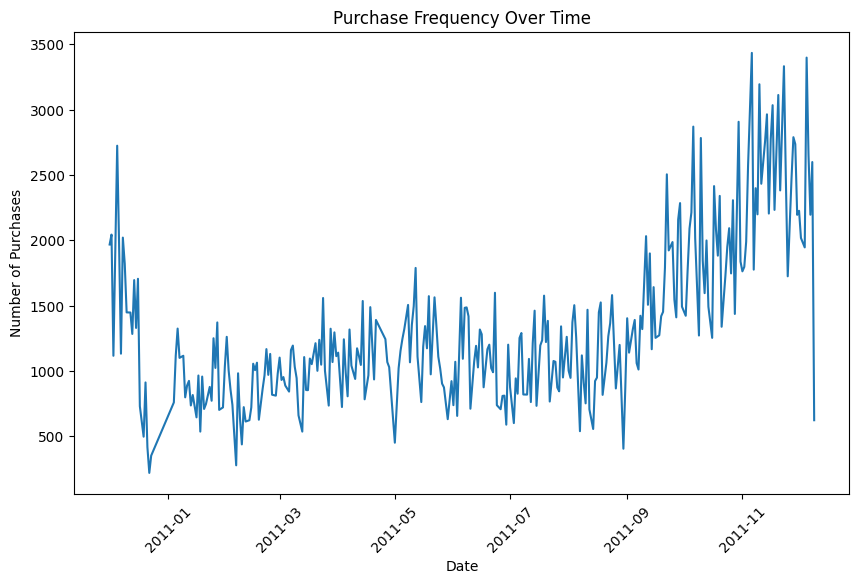

In [34]:
# Group by date
purchase_trends = data.groupby(data['InvoiceDate'].dt.date).size()
plt.figure(figsize=(10, 6))
purchase_trends.plot()
plt.title('Purchase Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.show()


#### 2. Product Category Analysis
Visualization: Pie chart or bar chart showing the distribution of purchases across different product categories.
Insight: Identify which categories are most popular among customers.

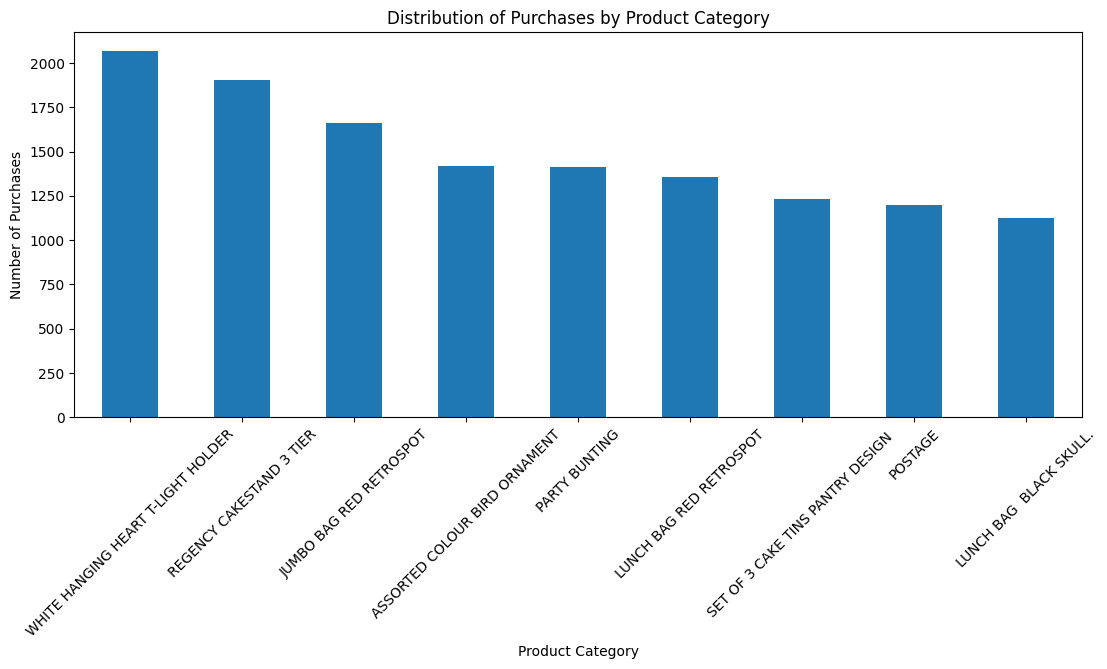

In [54]:
# Assuming 'Category' is a column in your dataset
category_counts = data['Description'].value_counts().head(9)
plt.figure(figsize=(13, 5))
category_counts.plot(kind='bar')
plt.title('Distribution of Purchases by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.show()


### Conclussion

These visualizations can provide deeper insights into customer behaviors, helping you make data-driven decisions